# Classification algorithms

### Dataset description, visualisation, and pre-processing

<div class="alert alert-block alert-warning">The Heart Disease Detection dataset is composed of a set of characteristics used to determine if a patient has heart disease or not. Its main purpose is to perform classification based on the target variable, 'HeartDisease,' which indicates the presence of heart disease in the patient. This variable has integer values where 0 represents no disease and 1 indicates the presence of disease.
<div/>

<div class="alert alert-block alert-danger"> 
    
1. Import the Heart Disease Detection dataset.
2. Display and try to understand each feature in this dataset.
3. Display a summary of the dataset.
4. Verify if the dataset contains any missing values.
5. Plot the distribution of samples according to the target variable HeartDisease. Determine if the dataset is balanced.
6. Apply dummy encoding to all categorical features in the dataset.
7. Display the Pearson correlation matrix. Is there a correlation with the class and between features by considering a thresholed of 0.5?
8. Display the distribution of all features on all the scaled data (except binary features) using a histplot. What do you observe?
9. Split the data into a training and a testing set using a ratio of 0.3.
10. Normalize the data using z-score scaling.
<div/>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    

In [2]:
df=pd.read_csv("heart.csv")
categorical=df.select_dtypes(include=['object', 'category']).columns 
print(categorical)

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe(include="all")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [5]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Text(0, 0.5, 'Count')

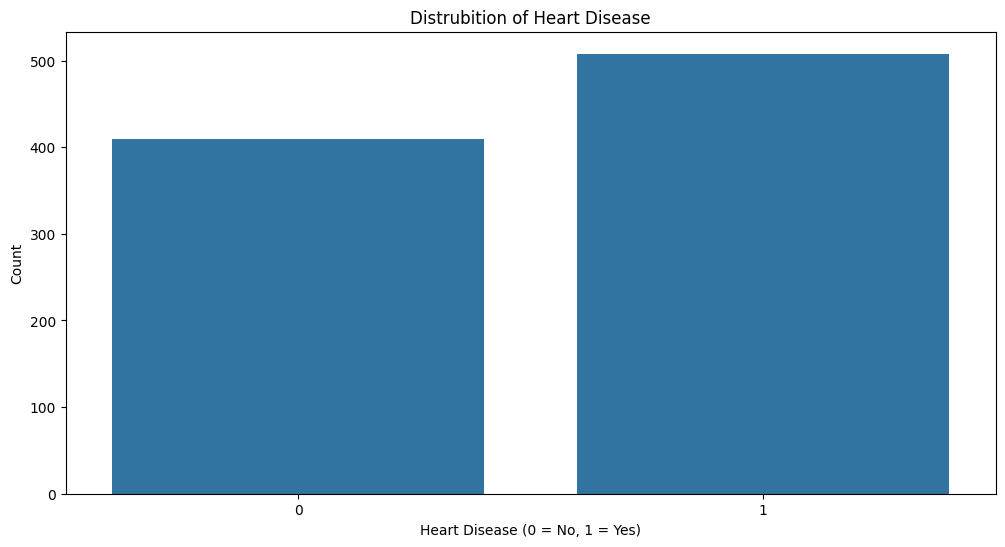

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(x='HeartDisease', data=df)
plt.title("Distrubition of Heart Disease")
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')

In [7]:
heart_disease_counts = df['HeartDisease'].value_counts()
print("Class distribution:\n", heart_disease_counts)
if min(heart_disease_counts) / sum(heart_disease_counts) < 0.4:
    print("The dataset is imbalanced.")
else:
    print("The dataset is balanced.")

Class distribution:
 HeartDisease
1    508
0    410
Name: count, dtype: int64
The dataset is balanced.


In [8]:
prepro=ColumnTransformer(transformers=[('onehot',OneHotEncoder(drop="first"),categorical)],remainder="passthrough")
df_transformed=prepro.fit_transform(df)
print(df_transformed.shape)


(918, 16)


In [9]:
encoded_feature_names = prepro.named_transformers_['onehot'].get_feature_names_out(categorical)
all_feature_names = list(encoded_feature_names) + list(df.drop(columns=categorical).columns)

df_encoded = pd.DataFrame(df_transformed, columns=all_feature_names)


In [10]:
df_encoded

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,40.0,140.0,289.0,0.0,172.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,49.0,160.0,180.0,0.0,156.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,37.0,130.0,283.0,0.0,98.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,48.0,138.0,214.0,0.0,108.0,1.5,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,54.0,150.0,195.0,0.0,122.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,45.0,110.0,264.0,0.0,132.0,1.2,1.0
914,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,68.0,144.0,193.0,1.0,141.0,3.4,1.0
915,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,57.0,130.0,131.0,0.0,115.0,1.2,1.0
916,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,57.0,130.0,236.0,0.0,174.0,0.0,1.0


<Axes: >

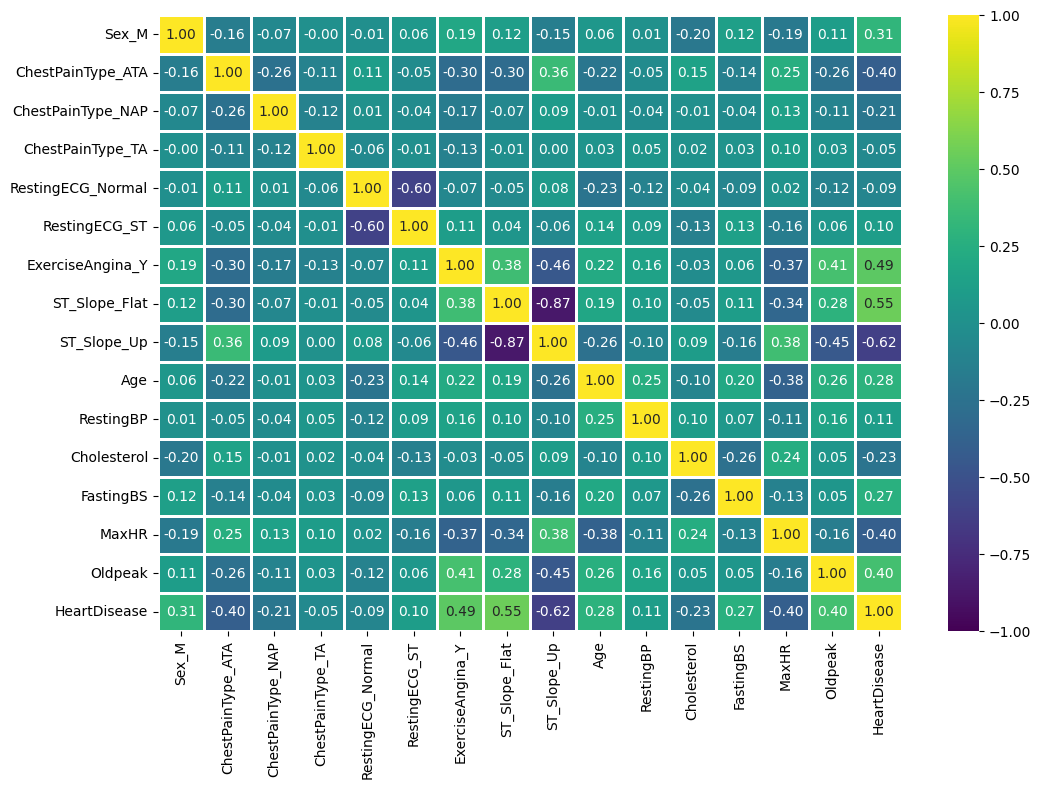

In [11]:
plt.figure(figsize=(12,8))
corr_matrix=df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, center=0,vmax=1,vmin=-1, fmt=".2f", linewidths=2,cmap="viridis")

In [12]:
threshold = 0.5
strong_correlations = corr_matrix["HeartDisease"][abs(corr_matrix["HeartDisease"]) > threshold]

In [13]:
print(strong_correlations)

ST_Slope_Flat    0.554134
ST_Slope_Up     -0.622164
HeartDisease     1.000000
Name: HeartDisease, dtype: float64


['Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up', 'FastingBS', 'HeartDisease'] 

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


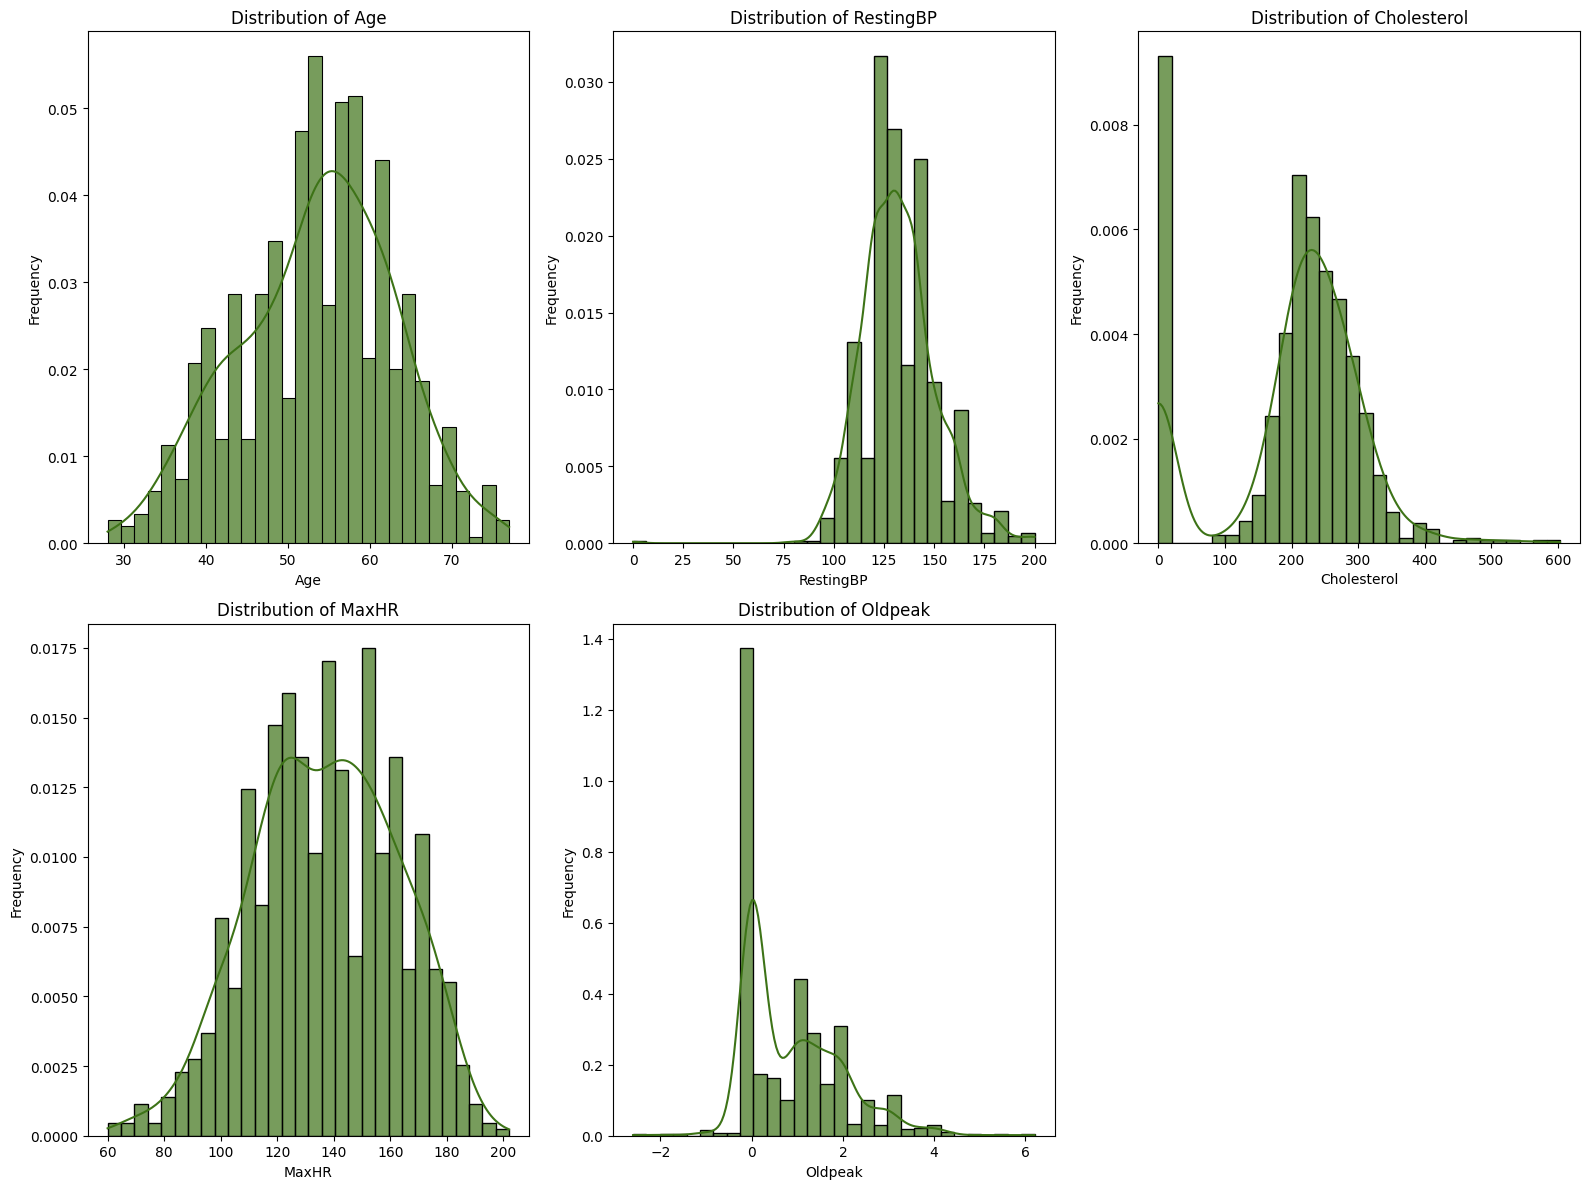

In [14]:
# Exclude binary features (assumed to have unique values <= 2)
binary_features = [col for col in df_encoded.columns if df_encoded[col].nunique() <= 2]
non_binary_features = [col for col in df_encoded.columns if col not in binary_features]
print(binary_features,"\n")
print(non_binary_features)

# Plot the distribution of each non-binary feature
plt.figure(figsize=(16, 12))
for i, feature in enumerate(non_binary_features,start=1):
    plt.subplot((len(non_binary_features) // 3) + 1, 3, i)
    sns.histplot(df_encoded[feature], kde=True, bins=30, color='#3D7317',stat='density',alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

General Observations:
Skewness:

Features like Cholesterol and Oldpeak are heavily skewed, which might affect certain models (e.g., linear regression). Transformations (e.g., logarithmic scaling) might help normalize them.
Feature Scaling:

Features have varying ranges, which makes scaling (e.g., standardization or normalization) necessary for algorithms sensitive to scale differences.
Potential Outliers:

Outliers are visible in features like Cholesterol and Oldpeak, which could be further analyzed for their impact on modeling.

In [15]:
df_skew=df_encoded.drop(columns=binary_features)
from scipy.stats import skew
print(non_binary_features,"\n")
print(skew(df_skew))

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'] 

[-0.19561273  0.17954532 -0.6090891  -0.14412343  1.0211999 ]


In [16]:
X = df_encoded.drop(columns=['HeartDisease'])  
y = df_encoded['HeartDisease'] 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (642, 15)
Testing features shape: (276, 15)
Training target shape: (642,)
Testing target shape: (276,)


In [18]:
scaler= StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [19]:

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled_df.head()

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,0.544949,-0.489267,-0.520852,-0.209529,0.817027,-0.494152,-0.830346,-1.025241,1.158907,0.464714,-1.772314,0.294989,-0.525682,0.774609,-0.729460
1,0.544949,-0.489267,-0.520852,-0.209529,0.817027,-0.494152,1.204318,-1.025241,-0.862882,0.781767,-1.234868,-1.905390,1.902289,-1.173673,0.990283
2,0.544949,-0.489267,1.919930,-0.209529,-1.223950,-0.494152,1.204318,0.975381,-0.862882,-0.063707,1.452358,-1.905390,1.902289,-0.605424,-0.819972
3,0.544949,-0.489267,-0.520852,-0.209529,0.817027,-0.494152,1.204318,0.975381,-0.862882,0.993136,1.452358,0.257376,1.902289,-1.295440,0.085155
4,0.544949,-0.489267,-0.520852,-0.209529,-1.223950,-0.494152,1.204318,-1.025241,1.158907,0.993136,-0.159978,1.197709,1.902289,-0.199532,0.809258


<div class="alert alert-block alert-danger"> 
    
1. Train the following algorithms on the generated training dataset: Gaussian Naive Bayes, KNN(K=3), and decision tree (max_depth=6).
2. Display and save the tree generated by the decision tree algorithm.
3. Implement the SVM algorithm from scratch and apply it to the dataset.
4. Print the classification reports and confusion matrices of all models on the testing set. Discuss the obtained results.
5. Display the ROC curves of the generated models in one plot.
6. Which evaluation metric do you recommend for this dataset?
7. Predict the class of the third sample from the testing set based on the best-performing model.
8. Perform the cross-validation evaluation method on the best model based on the selected metric.
</div>

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


knn = KNeighborsClassifier(n_neighbors=3)
decision_tree=DecisionTreeClassifier(max_depth=6)
gnb=GaussianNB()

knn.fit(X_train_scaled, y_train)
decision_tree.fit(X_train_scaled, y_train)
gnb.fit(X_train_scaled, y_train)


GaussianNB()

In [21]:

knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)


gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)


decision_tree.fit(X_train_scaled, y_train)
y_pred_dt = decision_tree.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

{
    "Gaussian Naive Bayes Accuracy": accuracy_gnb,
    "KNN Accuracy (K=3)": accuracy_knn,
    "Decision Tree Accuracy (max_depth=6)": accuracy_dt
}

{'Gaussian Naive Bayes Accuracy': 0.8768115942028986,
 'KNN Accuracy (K=3)': 0.8586956521739131,
 'Decision Tree Accuracy (max_depth=6)': 0.8260869565217391}

In [22]:
from sklearn.tree import export_text

tree_rules = export_text(decision_tree, feature_names=X_train.columns)
print(tree_rules)


|--- ST_Slope_Up <= 0.15
|   |--- ExerciseAngina_Y <= 0.19
|   |   |--- Sex_M <= -0.65
|   |   |   |--- RestingBP <= 0.65
|   |   |   |   |--- FastingBS <= 0.69
|   |   |   |   |   |--- MaxHR <= -1.25
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- MaxHR >  -1.25
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- FastingBS >  0.69
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- RestingBP >  0.65
|   |   |   |   |--- ChestPainType_TA <= 2.28
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- ChestPainType_TA >  2.28
|   |   |   |   |   |--- class: 0.0
|   |   |--- Sex_M >  -0.65
|   |   |   |--- Oldpeak <= -0.77
|   |   |   |   |--- ChestPainType_ATA <= 0.78
|   |   |   |   |   |--- MaxHR <= -1.60
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- MaxHR >  -1.60
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- ChestPainType_ATA >  0.78
|   |   |   |   |   |--- Cholesterol <= 0.43
|   |   |   |   |   |   |--- class: 0.0
|   

when you import and use DecisionTreeClassifier from sklearn.tree, it is based on the CART (Classification and Regression Trees) algorithm, not ID3 or C4.5. Here's a detailed explanation:


CART Algorithm
CART is the algorithm implemented in Scikit-learn's DecisionTreeClassifier.
It differs from ID3 and C4.5 in the following ways:
Splitting Criterion:
CART uses Gini Impurity (default) or Entropy (optional, similar to ID3/C4.5) to determine splits.
Binary Splits:
CART always produces binary trees (i.e., each internal node has two children).
In contrast, ID3 and C4.5 can produce multiway splits.
Output:
CART is used for both classification and regression tasks.
In classification, it predicts class labels.
In regression, it predicts continuous values.


In [23]:
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree

# # Convert class names to strings for compatibility
# class_names = [str(cls) for cls in decision_tree.classes_]

# plt.figure(figsize=(40, 25))  # Increase figure size
# plot_tree(
#     decision_tree,
#     feature_names=X_train.columns,  # Ensure X_train is a DataFrame
#     class_names=class_names,
#     filled=True,
#     rounded=True,
#     fontsize=10, 
#     max_depth=4 # Adjust font size for readability
# )
# plt.title("Decision Tree Visualization", fontsize=12)
# plt.savefig("decision_tree_visualization_readable.png", dpi=300)  # Save at high resolution
# {"Decision Tree Visualization Saved at": '/mnt/data/decision_tree_visualization.png'}
# plt.show()



<div > 
    
Key Components of the SVM Class
Initialization (__init__):<br>

learning_rate: The step size for weight updates. <br>
lambda_param: Regularization parameter to prevent overfitting.<br>
n_iters: Number of iterations for the optimization process.<br>
w and b: Weights and bias initialized to zeros.<br>
Fitting the Model (fit):<br>

Converts labels to -1 and 1, as required by the SVM optimization problem.<br>
Updates weights and bias using gradient descent:<br>
If the current sample is correctly classified, the weights are updated only with the regularization term<br>.
If the sample is misclassified, the weights are updated to minimize the hinge loss function, and the bias is adjusted.<br>
Prediction (predict):

Computes the linear output of the model for each input sample: <br>
linear_output
=
𝑋
⋅
𝑤
−
𝑏
linear_output=X⋅w−b.
Applies the sign function to determine the class (-1 or 1).
<img src="Screenshot 2024-12-03 100941.png" alt="Description" width="1000">


<div/>

In [24]:
import numpy as np

class SVM:
        def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
            self.lr = learning_rate
            self.lambda_param = lambda_param
            self.n_iters = n_iters
            self.w = None
            self.b = None

        def fit(self, X, y):
            n_samples, n_features = X.shape
            y = np.where(y <= 0, -1, 1) 

            self.w = np.zeros(n_features)
            self.b = 0

            for _ in range(self.n_iters):
                for idx, x_i in enumerate(X):
                    condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                    if condition:
                       
                        self.w -= self.lr * (2 * self.lambda_param * self.w)
                    else:
                        
                        self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                        self.b -= self.lr * y[idx]

        def predict(self, X):
            linear_output = np.dot(X, self.w) - self.b
            return np.sign(linear_output)

   
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

    
svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X_train_scaled, y_train.values)
y_pred_svm = svm.predict(X_test_scaled)


accuracy_svm = accuracy_score(y_test, np.where(y_pred_svm == -1, 0, 1))

{
        
        "SVM Accuracy": accuracy_svm
}


{'SVM Accuracy': 0.8731884057971014}

In [25]:
from sklearn.svm import SVC
svm1 = SVC(kernel='linear', C=1.0, random_state=42)
svm1.fit(X_train, y_train)
y_pred = svm1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8731884057971014


In [26]:

print("Shape of X_train:", X_train_scaled.shape)
print("Shape of X_test:", X_test_scaled.shape)

Shape of X_train: (642, 15)
Shape of X_test: (276, 15)


Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       112
         1.0       0.92      0.87      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276

Gaussian Naive Bayes Confusion Matrix:
[[ 99  13]
 [ 21 143]]

KNN (K=3) Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       112
         1.0       0.92      0.84      0.88       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.87      0.86      0.86       276

KNN (K=3) Confusion Matrix:
[[100  12]
 [ 27 137]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80       112
        

c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Anaconda3\Lib\site-packages\s

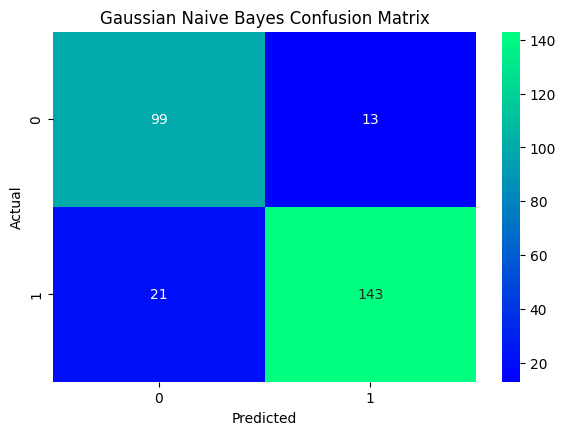

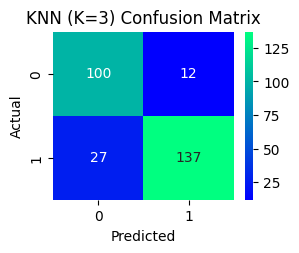

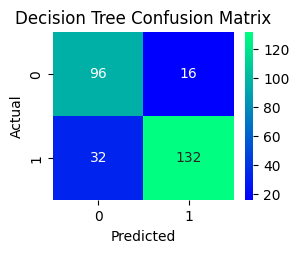

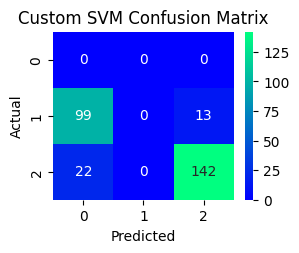

<Figure size 640x480 with 0 Axes>

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



y_pred_gnb = gnb.predict(X_test_scaled)
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_gnb))
print("Gaussian Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb))


y_pred_knn = knn.predict(X_test_scaled)
print("\nKNN (K=3) Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN (K=3) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


y_pred_dt = decision_tree.predict(X_test_scaled)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

y_pred_svm = svm.predict(X_test_scaled) 
print("\nCustom SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Custom SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

models = ["Gaussian Naive Bayes", "KNN (K=3)", "Decision Tree", "Custom SVM"]
predictions = [y_pred_gnb, y_pred_knn, y_pred_dt, y_pred_svm]

plt.figure(figsize=(15, 10))
for i, (model, y_pred) in enumerate(zip(models, predictions)):
    plt.subplot(2, 2, i + 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='winter')
    plt.title(f"{model} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
plt.tight_layout()
plt.show()


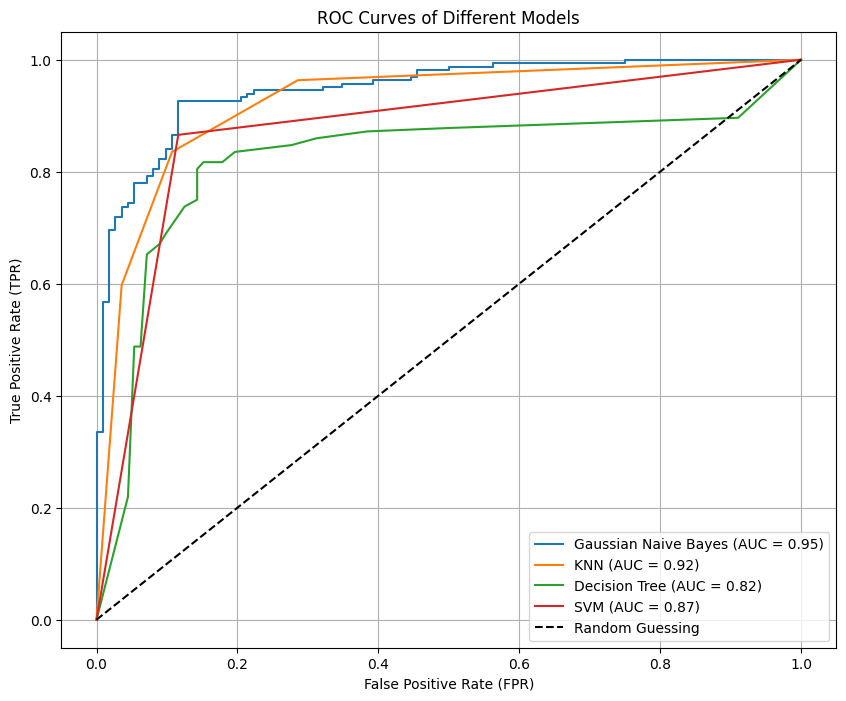

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curves and AUC for all models
# Gaussian Naive Bayes
gnb_probs = gnb.predict_proba(X_test_scaled)[:, 1]
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, gnb_probs)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# KNN
knn_probs = knn.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Decision Tree
dt_probs = decision_tree.predict_proba(X_test_scaled)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# SVM (Manual computation of probabilities not directly possible; approximating using decision function)
svm_scores = svm.predict(X_test_scaled)
svm_probs = (svm_scores - svm_scores.min()) / (svm_scores.max() - svm_scores.min())  # Normalize
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_gnb, tpr_gnb, label=f'Gaussian Naive Bayes (AUC = {roc_auc_gnb:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')

# Plot diagonal for reference
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')


plt.title('ROC Curves of Different Models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [34]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, matthews_corrcoef,f1_score


metrics = {}

metrics['Gaussian Naive Bayes'] = {
    "Precision": precision_score(y_test, y_pred_gnb),
    "Recall": recall_score(y_test, y_pred_gnb),
    "ROC-AUC": roc_auc_score(y_test, gnb_probs),
    "MCC": matthews_corrcoef(y_test, y_pred_gnb),
}


metrics['KNN'] = {
    "Precision": precision_score(y_test, y_pred_knn),
    "Recall": recall_score(y_test, y_pred_knn),
    "ROC-AUC": roc_auc_score(y_test, knn_probs),
    "MCC": matthews_corrcoef(y_test, y_pred_knn),
}

metrics['Decision Tree'] = {
    "Precision": precision_score(y_test, y_pred_dt),
    "Recall": recall_score(y_test, y_pred_dt),
    "ROC-AUC": roc_auc_score(y_test, dt_probs),
    "MCC": matthews_corrcoef(y_test, y_pred_dt),
}

metrics['SVM'] = {
    "Precision": precision_score(y_test, np.where(y_pred_svm == -1, 0, 1)),
    "Recall": recall_score(y_test, np.where(y_pred_svm == -1, 0, 1)),
    "ROC-AUC": roc_auc_score(y_test, svm_probs),
    "MCC": matthews_corrcoef(y_test, np.where(y_pred_svm == -1, 0, 1)),
}

# Add F1-Score to the metrics dictionary
metrics['Gaussian Naive Bayes']['F1-Score'] = f1_score(y_test, y_pred_gnb)
metrics['KNN']['F1-Score'] = f1_score(y_test, y_pred_knn)
metrics['Decision Tree']['F1-Score'] = f1_score(y_test, y_pred_dt)
metrics['SVM']['F1-Score'] = f1_score(y_test, np.where(y_pred_svm == -1, 0, 1))

# Display the updated metrics dictionary
metrics


{'Gaussian Naive Bayes': {'Precision': 0.9166666666666666,
  'Recall': 0.8719512195121951,
  'ROC-AUC': 0.9474085365853658,
  'MCC': 0.7487395040651555,
  'F1-Score': 0.89375},
 'KNN': {'Precision': 0.9194630872483222,
  'Recall': 0.8353658536585366,
  'ROC-AUC': 0.9236716027874564,
  'MCC': 0.7174643561391505,
  'F1-Score': 0.8753993610223643},
 'Decision Tree': {'Precision': 0.8918918918918919,
  'Recall': 0.8048780487804879,
  'ROC-AUC': 0.822217987804878,
  'MCC': 0.6518787094046867,
  'F1-Score': 0.8461538461538461},
 'SVM': {'Precision': 0.9161290322580645,
  'Recall': 0.8658536585365854,
  'ROC-AUC': 0.8748911149825783,
  'MCC': 0.7420062175820538,
  'F1-Score': 0.890282131661442}}

Recommended Metric:


Recall

Why Recall?
Recall focuses on minimizing false negatives, which are critical in healthcare scenarios. A false negative would mean failing to diagnose a patient with heart disease, which could have severe or life-threatening consequences.
Recall ensures that most patients who have heart disease are correctly identified, even if it results in some false positives.

F1-Score:

Balances precision and recall, which is essential in situations where both false positives and false negatives are critical.

In [30]:
# Identify the best-performing model (Gaussian Naive Bayes based on earlier metrics)
# Extract the third sample from the test set
third_sample = X_test_scaled[2].reshape(1, -1)  # Reshape for prediction

predicted_class = decision_tree.predict(third_sample)
print(predicted_class[0])
predicted_class = gnb.predict(third_sample)
print(predicted_class[0])
predicted_class = svm.predict(third_sample)
print(predicted_class[0])
predicted_class = knn.predict(third_sample)
print(predicted_class[0])

1.0
1.0
1.0
1.0


In [31]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the best-performing model (Gaussian Naive Bayes) using Recall
cv_scores = cross_val_score(gnb, X_train_scaled, y_train, cv=5, scoring='recall')

# Display the cross-validation results
{
    "Cross-Validation Recall Scores": cv_scores,
    "Mean Recall": cv_scores.mean(),
    "Standard Deviation": cv_scores.std()
}


{'Cross-Validation Recall Scores': array([0.84057971, 0.91304348, 0.85507246, 0.86956522, 0.86764706]),
 'Mean Recall': 0.8691815856777494,
 'Standard Deviation': 0.02426314972128338}

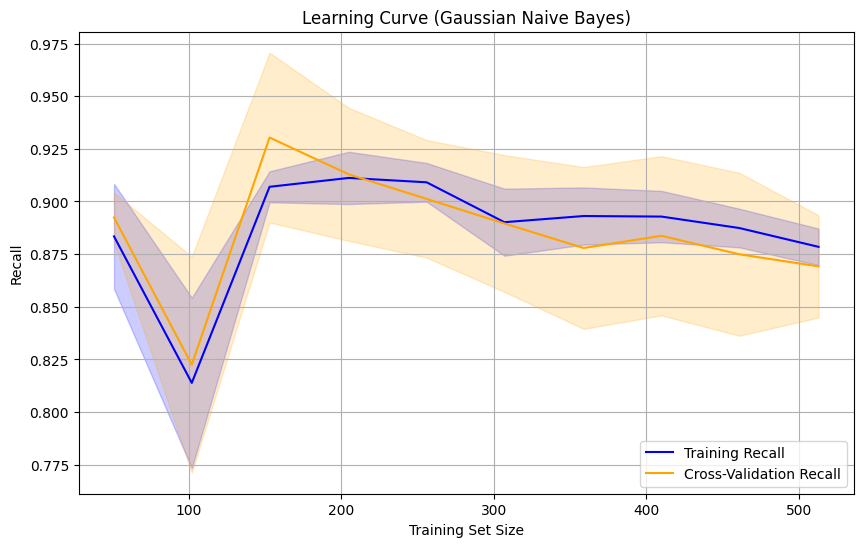

In [32]:
# Import learning curve utility
from sklearn.model_selection import learning_curve
import numpy as np

# Generate learning curve data for Gaussian Naive Bayes using Recall
train_sizes, train_scores, test_scores = learning_curve(
    gnb, X_train_scaled, y_train, cv=5, scoring='recall', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Recall', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-Validation Recall', color='orange')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.2)

# Add plot details
plt.title('Learning Curve (Gaussian Naive Bayes)')
plt.xlabel('Training Set Size')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('learning_curve.png')
plt.show()
